In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [32]:
seed = 1 # 1 or 10


x_m, y_m = make_classification(n_samples=60000, n_features=10, n_redundant=2, weights=[0.6], random_state=seed)
x_f, y_f = make_classification(n_samples=15000, n_features=10, n_redundant=2, weights=[0.4], random_state=seed)
m = np.array([[0] for _ in range(60000)])
f = np.array([[1] for _ in range(15000)])

In [33]:
m_join = np.append(x_m, m, axis=1)
m_join = np.append(m_join, np.expand_dims(y_m, axis=1), axis=1)

f_join = np.append(x_f, f, axis=1)
f_join = np.append(f_join, np.expand_dims(y_f, axis=1), axis=1)

join = np.append(m_join, f_join, axis=0)
np.random.seed = seed
np.random.shuffle(join)

headers = ''
for i in range(1, 11):
    headers += '"x' + str(i) + '",'
headers += '"a","y"'
np.savetxt("data.csv", join, delimiter=',', header=headers, comments='')
# print(np.unique(y_m, return_counts= True))

In [34]:
df = pd.read_csv("data.csv")

In [35]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,a,y
0,-0.287636,0.506189,-0.024224,0.602701,0.327828,1.660002,-1.754817,0.317142,1.231050,-0.128783,1.0,1.0
1,1.284471,1.826018,0.117306,0.773628,0.721084,-0.715517,-0.769710,1.432711,0.681916,-0.620531,0.0,1.0
2,-0.316433,1.168951,1.509184,0.265217,-0.803181,0.609749,-2.348921,0.087807,1.991150,-0.596610,1.0,1.0
3,-1.200409,-1.824233,-0.042452,1.138809,0.009383,-2.050639,-0.150381,-1.093529,-1.303495,0.405340,0.0,0.0
4,-1.233830,-2.065664,0.065156,0.390186,1.169674,0.028284,-1.563045,-0.487033,1.067256,0.760097,0.0,0.0


In [37]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
model = LogisticRegression(solver="lbfgs", random_state=seed)
# model = DecisionTreeClassifier()
model.fit(x_train, y_train)

comb = x_test.join(y_test)
comb.head()

sex_1 = comb.loc[comb['a'] == 0]
sex_2 = comb.loc[comb["a"] == 1]
#
x_1 = sex_1.iloc[:, :-1]
y_1 = sex_1.iloc[:, -1]

x_2 = sex_2.iloc[:, :-1]
y_2 = sex_2.iloc[:, -1]

p_1 = model.predict_proba(x_1)[: ,1] # only keep positive results
p_2 = model.predict_proba(x_2)[: ,1] # only keep positive results

In [39]:
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_1)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

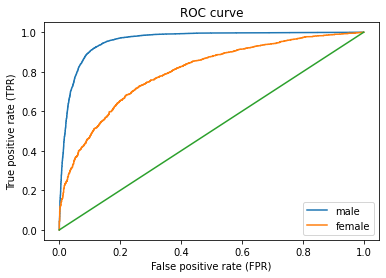

In [40]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])

plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

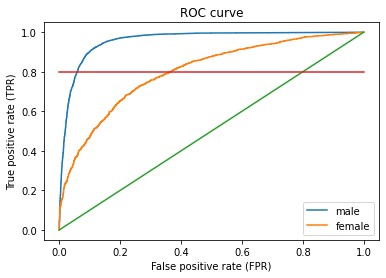

In [41]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

In [42]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.805:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

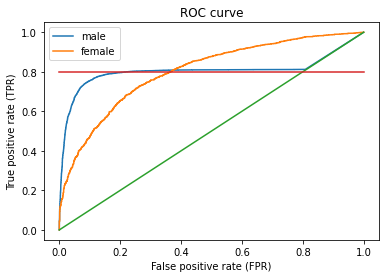

In [43]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

In [44]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.3 and i < 0.8:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

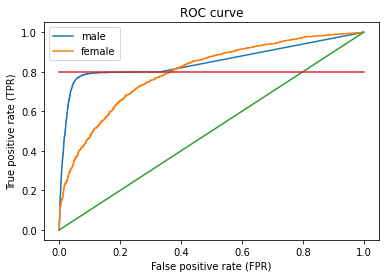

In [45]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()


In [95]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.805:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

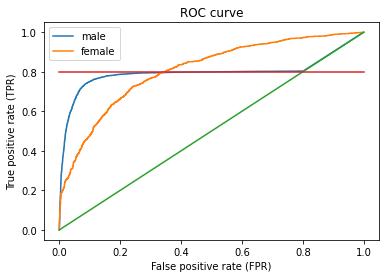

In [96]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()

In [103]:
p_corrected = []
for i in p_1:
    rand = random.random()
    if rand > 0.3 and i < 0.8:
        p_corrected.append(0)
    else:
        p_corrected.append(i)
        
fpr_1, tpr_1, thresholds_1 = roc_curve(y_1, p_corrected)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_2, p_2)

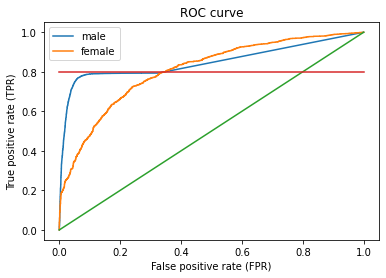

In [104]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
plt.plot([0.8, 0.8])
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()